In [1]:
!pip install pandas-datareader

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
import pandas_datareader.data as web
start='2018-01-01'
end='2023-01-01'

df=web.DataReader('JPM','stooq',start,end)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-12-30,132.81,134.33,132.44,134.10,9292519.0
2022-12-29,132.93,133.27,132.31,133.22,6585228.0
2022-12-28,131.85,133.41,131.01,132.46,8827738.0
2022-12-27,131.57,132.22,130.55,131.74,5410991.0
2022-12-23,130.58,131.44,129.64,131.28,5091905.0


In [4]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-08,94.0335,94.5089,93.6680,94.3390,1.433571e+07
2018-01-05,95.0277,95.2557,93.7240,94.1592,1.626962e+07
2018-01-04,94.2162,95.6731,94.0807,94.8185,1.489419e+07
2018-01-03,93.3104,93.8655,92.9685,93.4803,1.375167e+07
2018-01-02,93.0982,93.4430,92.3918,93.3870,1.568855e+07


In [5]:
#  Date becomes column and are removable.
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Volume
0,2022-12-30,132.81,134.33,132.44,134.10,9292519.0
1,2022-12-29,132.93,133.27,132.31,133.22,6585228.0
2,2022-12-28,131.85,133.41,131.01,132.46,8827738.0
3,2022-12-27,131.57,132.22,130.55,131.74,5410991.0
4,2022-12-23,130.58,131.44,129.64,131.28,5091905.0


In [6]:
df=df.drop(['Date'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,132.81,134.33,132.44,134.10,9292519.0
1,132.93,133.27,132.31,133.22,6585228.0
2,131.85,133.41,131.01,132.46,8827738.0
3,131.57,132.22,130.55,131.74,5410991.0
4,130.58,131.44,129.64,131.28,5091905.0


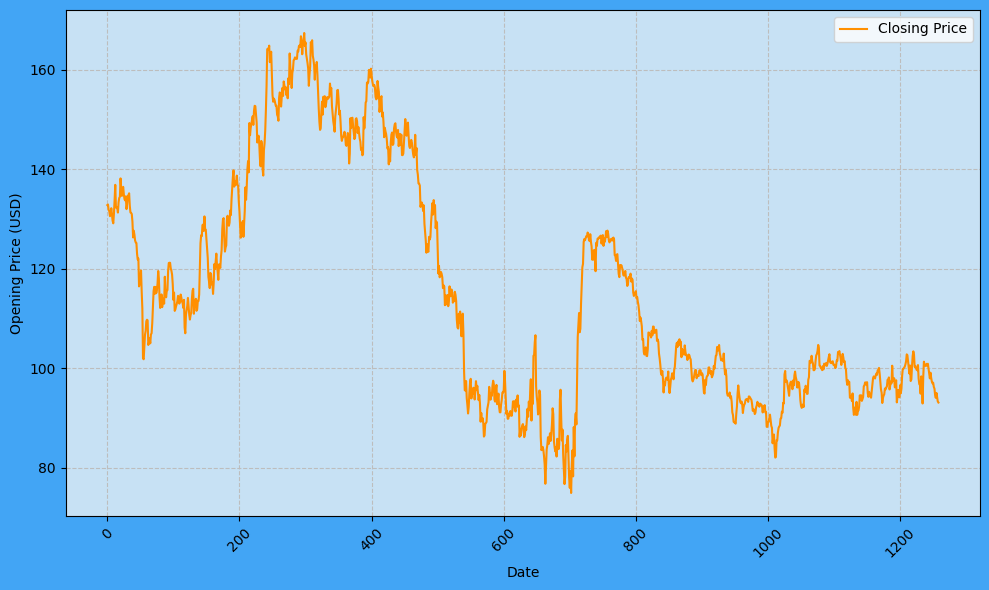

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

fig=plt.figure(figsize=(10,6))
fig.patch.set_facecolor('#42A5F5')

ax=plt.axes()
ax.set_facecolor('#C7E1F4')

plt.plot(df.Open, '#FF8F00', label='Closing Price')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Opening Price (USD)')
plt.xticks(rotation=45)

plt.grid(True,linestyle='--',color='#BDBDBD')
plt.tight_layout()
plt.show()

In [8]:
df

,Open,High,Low,Close,Volume
0,132.8100,134.3300,132.4400,134.1000,9.292519e+06
1,132.9300,133.2700,132.3100,133.2200,6.585228e+06
2,131.8500,133.4100,131.0100,132.4600,8.827738e+06
3,131.5700,132.2200,130.5500,131.7400,5.410991e+06
4,130.5800,131.4400,129.6400,131.2800,5.091905e+06
...,...,...,...,...,...
1254,94.0335,94.5089,93.6680,94.3390,1.433571e+07
1255,95.0277,95.2557,93.7240,94.1592,1.626962e+07
1256,94.2162,95.6731,94.0807,94.8185,1.489419e+07
1257,93.3104,93.8655,92.9685,93.4803,1.375167e+07


In [9]:
# ma100 is created for finding the mean of the 100 values and displaying them.
# for that rolling() function is used.

ma100=df.Open.rolling(100).mean()
ma100

,Open
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1254,97.944166
1255,97.951053
1256,97.952507
1257,97.931562


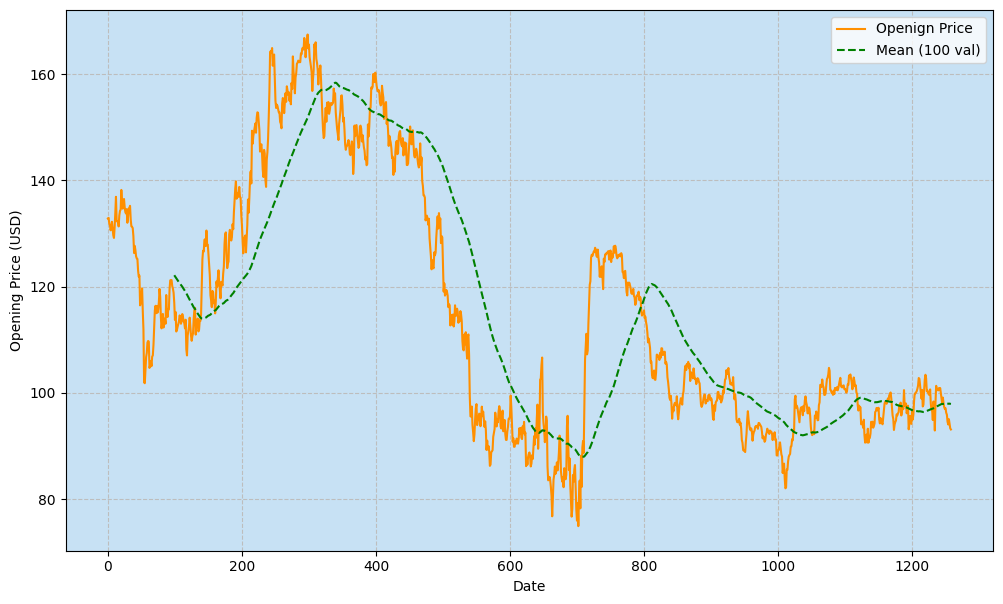

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
fig.patch.set_facecolor('#42A5F5')

ax=plt.axes()
ax.set_facecolor('#C7E1F4')

plt.grid(True,linestyle='--',color='#BDBDBD')
plt.tight_layout()

plt.plot(df.Open, '#FF8F00', label='Openign Price')
plt.plot(ma100,'g--',label='Mean (100 val)') # this is the mean of 100 values

plt.legend()
plt.xlabel('Date')
plt.ylabel('Opening Price (USD)')
plt.show()

In [11]:
ma200=df.Open.rolling(200).mean()
ma200

,Open
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1254,98.179349
1255,98.175973
1256,98.170776
1257,98.154954


Text(0, 0.5, 'Opening Price (USD)')

<Figure size 1200x600 with 0 Axes>

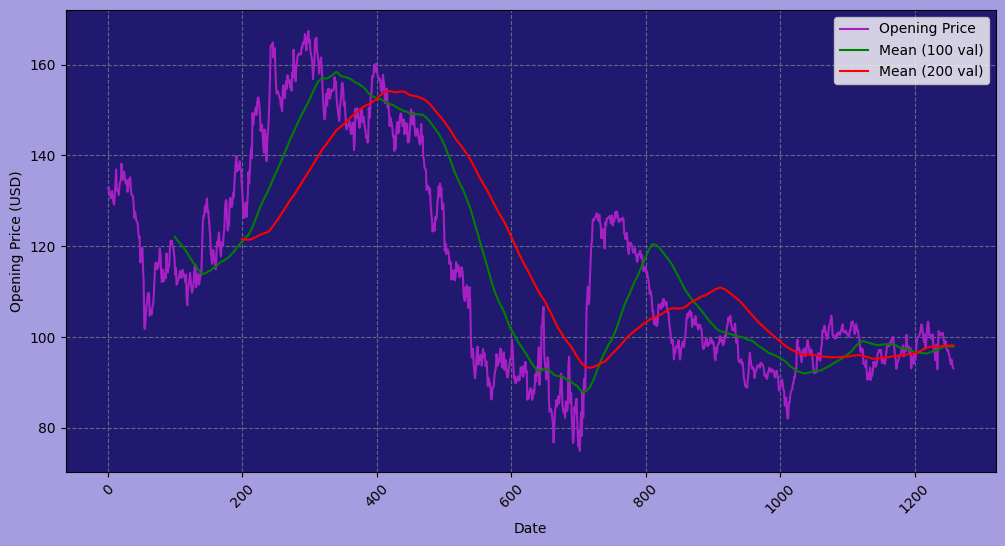

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

ma100=df.Open.rolling(100).mean()
ma100

fig=plt.figure(figsize=(12,6))
fig.patch.set_facecolor('#A59DDF')

ax=plt.axes()
ax.set_facecolor('#211970')

plt.grid(True,linestyle='--',color='#626784')
plt.xticks(rotation=45)

plt.plot(df.Open,'#A720C4',label='Opening Price')
plt.plot(ma100,'g',label='Mean (100 val)') # this is the mean of 100 values
plt.plot(ma200,'r',label='Mean (200 val)') # this is the mean of 200 values

plt.legend()
plt.xlabel('Date')
plt.ylabel('Opening Price (USD)')

In [13]:
df.shape

(1259, 5)

In [14]:
# splitting the data into training and testing
import pandas as pd

data_training = pd.DataFrame(df['Open'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Open'][int(len(df)*0.70):int(len(df))])

print("Used data for training: ", data_training.shape)
print("Used data for testing: ", data_testing.shape)

Used data for training:  (881, 1)
Used data for testing:  (378, 1)


In [15]:
data_training.head()

,Open
0,132.81
1,132.93
2,131.85
3,131.57
4,130.58


In [16]:
data_testing.head()

,Open
881,102.5960
882,102.0360
883,101.7710
884,99.8160
885,97.8218


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.62585126],
       [0.62714821],
       [0.61547565],
       [0.61244943],
       [0.60174959],
       [0.60736971],
       [0.61904227],
       [0.60596468],
       [0.59169822],
       [0.58629425],
       [0.60785606],
       [0.63633495],
       [0.66989355],
       [0.62142001],
       [0.61925843],
       [0.62066346],
       [0.60963937],
       [0.63211986],
       [0.64130659],
       [0.64400857],
       [0.68388982],
       [0.66130125],
       [0.64584592],
       [0.66108509],
       [0.66551634],
       [0.64887214],
       [0.63871269],
       [0.63590263],
       [0.64487321],
       [0.61709684],
       [0.62790476],
       [0.64606208],
       [0.64735903],
       [0.65157412],
       [0.62390583],
       [0.60974745],
       [0.60888282],
       [0.60628892],
       [0.58996895],
       [0.55559975],
       [0.57008237],
       [0.56165219],
       [0.54900691],
       [0.54457566],
       [0.54360295],
       [0.51982552],
       [0.5073964 ],
       [0.509

In [18]:
import numpy as np

# The data is dependant on the previous result. (ma100) and (ma200)
# So, to calculate the next day value we train the following array.
# 100 days are x_train and 101 day is y_train and it goes on changing.

x_train = []
y_train = []


for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])


x_train

# Now, converting x_train into numpy value, so that it can be provided to LSTM.
x_train,y_train = np.array(x_train), np.array(y_train)

In [19]:
!pip install tensorflow
!pip install tensorflow-addons==0.17.1

!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 26.7 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
  Attempting uninstall: tensorflow-addons
    Found existing installation: tensorflow-addons 0.17.1
    Uninstalling tensorflow-addons-0.17.1:
      Successfully uninstalled tensorflow-addons-0.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.3.1 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [20]:
import tensorflow as tf

# Use the recommended import path for LSTM
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [21]:

# Use the recommended import path for LSTM
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import Orthogonal

# ... rest of your code ...
import tensorflow as tf


model = tf.keras.Sequential()
model.add(LSTM(units=50,
               activation ='relu',
               return_sequences = True,
               input_shape=(x_train.shape[1],1),
                recurrent_initializer="orthogonal"
               )
)
model.add(Dropout(0.2))


# Second Layer
model.add(LSTM(units=60,
               activation ='relu',
               return_sequences = True,
               recurrent_initializer="orthogonal"
               )
)
model.add(Dropout(0.3))



model.add(LSTM(units=80,
               activation ='relu',
               return_sequences = True,
               recurrent_initializer="orthogonal"
               )
)
model.add(Dropout(0.4))



model.add(LSTM(units=120,
               activation ='relu',
               recurrent_initializer="orthogonal"
               )
)
model.add(Dropout(0.5))



# Dense Layer - to connect all the layers
# model.add(Dense(units=1))
model.add(tf.keras.layers.Dense(units=1, kernel_initializer=Orthogonal(gain=1.0, seed=None)))

# Set Optimizer
opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
!pip install tensorflow-addons==0.17.1

!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-addons

  Using cached tensorflow_addons-0.17.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.8 kB)
Using cached tensorflow_addons-0.17.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Attempting uninstall: tensorflow-addons
    Found existing installation: tensorflow-addons 0.23.0
    Uninstalling tensorflow-addons-0.23.0:
      Successfully uninstalled tensorflow-addons-0.23.0
  Using cached tensorflow_addons-0.23.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.8 kB)
Using cached tensorflow_addons-0.23.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (611 kB)
  Attempting uninstall: tensorflow-addons
    Found existing installation: tensorflow-addons 0.17.1
    Uninstalling tensorflow-addons-0.17.1:
      Successfully uninstalled tensorflow-addons-0.17.1


In [24]:
# Try importing AbstractRNNCell from tensorflow.python.keras.layers instead

from tensorflow.python.keras.layers import AbstractRNNCell

# Remove the incorrect import and keep the original correct one
# from tensorflow.python.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization # This line was already in a previous cell, keep it
from tensorflow.python.keras.callbacks import TensorBoard
from tensorflow.python.keras.callbacks import ModelCheckpoint

from tensorflow.python.keras.initializers import Orthogonal
from tensorflow.python.keras.metrics import MeanSquaredError, MeanAbsoluteError

model.compile(optimizer=opt,
              loss='mean_squared_error',  # Retain MSE for regression
              metrics=['accuracy',  # Include accuracy for reference (optional)
                       MeanSquaredError(),
                       MeanAbsoluteError()])

model.fit(x_train,y_train,epochs=150)

Epoch 1/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 597ms/step - accuracy: 0.0034 - loss: 0.2014 - mean_absolute_error: 0.4517 - mean_squared_error: 0.2799
Epoch 2/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 313ms/step - accuracy: 0.0021 - loss: 0.0343 - mean_absolute_error: 0.2261 - mean_squared_error: 0.0934
Epoch 3/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 248ms/step - accuracy: 0.0025 - loss: 0.0193 - mean_absolute_error: 0.1828 - mean_squared_error: 0.0630
Epoch 4/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 342ms/step - accuracy: 0.0038 - loss: 0.0179 - mean_absolute_error: 0.1600 - mean_squared_error: 0.0495
Epoch 5/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 251ms/step - accuracy: 7.5829e-04 - loss: 0.0165 - mean_absolute_error: 0.1462 - mean_squared_error: 0.0419
Epoch 6/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 327ms/step - accuracy: 7.4875e-04 - loss: 0.0161 - mean_absolute_error: 0.1377 - mean_squared_error: 0.0371
Epoch 7/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 249ms/step - accuracy: 6.2540e-04 - loss: 0.0172 - mean_absolute_error: 

In [25]:
model.save('5_18_23_150_open.h5')

In [26]:
data_testing.head()

,Open
881,102.5960
882,102.0360
883,101.7710
884,99.8160
885,97.8218


In [27]:
data_training.head()

,Open
0,132.81
1,132.93
2,131.85
3,131.57
4,130.58


In [28]:
# We need previous 100 days data and we need to compare and append the list.
past_100_days=data_training.tail(100)
final_df=pd.concat([past_100_days,data_testing],ignore_index=True)

In [29]:
final_df.head()

,Open
0,118.748
1,118.620
2,118.895
3,119.553
4,118.227


In [30]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.97855209],
       [0.97514174],
       [0.98246867],
       [1.        ],
       [0.9646709 ],
       [0.95681111],
       [0.91991005],
       [0.92960824],
       [0.96624286],
       [0.9654702 ],
       [0.97226426],
       [0.98587902],
       [0.94346278],
       [0.96022146],
       [0.95316097],
       [0.88511382],
       [0.86625032],
       [0.87909242],
       [0.87909242],
       [0.89217431],
       [0.85367465],
       [0.86126801],
       [0.83406514],
       [0.81546807],
       [0.78221715],
       [0.73196777],
       [0.75080463],
       [0.73119511],
       [0.70423203],
       [0.63093614],
       [0.63565202],
       [0.56573983],
       [0.55241815],
       [0.56366165],
       [0.59089117],
       [0.54559745],
       [0.54402549],
       [0.57964767],
       [0.67044825],
       [0.66940916],
       [0.65920475],
       [0.65736636],
       [0.6437516 ],
       [0.67934713],
       [0.65502174],
       [0.70266007],
       [0.70162098],
       [0.668

In [31]:
input_data.shape

(478, 1)

In [32]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])


In [33]:
x_test,y_test= np.array(x_test),np.array(y_test)

print(x_test.shape)
print(y_test.shape)

(378, 100, 1)
(378,)


In [34]:
# Making Predictions

y_predicted = model.predict(x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 285ms/step


In [35]:
y_predicted.shape

(378, 1)

In [36]:
y_test

array([0.5482085 , 0.53328822, 0.52622773, 0.47413995, 0.42100776,
       0.40833618, 0.41768267, 0.43226191, 0.45372581, 0.47020473,
       0.46864609, 0.4254572 , 0.44168567, 0.43906663, 0.43671136,
       0.46603238, 0.46864609, 0.46708745, 0.44168567, 0.45268139,
       0.44561024, 0.39752696, 0.34881224, 0.34303063, 0.41689669,
       0.38873199, 0.43016775, 0.4377611 , 0.44037748, 0.48250597,
       0.4835717 , 0.46341866, 0.44901526, 0.46418333, 0.43042885,
       0.43854442, 0.45084832, 0.49113842, 0.4764899 , 0.51314584,
       0.54559745, 0.54927423, 0.59270292, 0.57282697, 0.58644173,
       0.6032004 , 0.55947864, 0.5437857 , 0.52124542, 0.52700038,
       0.52097898, 0.51682262, 0.55764025, 0.48985954, 0.44639888,
       0.47099604, 0.43618915, 0.34682464, 0.33247986, 0.33119831,
       0.33198429, 0.34881224, 0.31855604, 0.32946916, 0.30080889,
       0.2425665 , 0.22809383, 0.19149917, 0.18861902, 0.18723357,
       0.18176102, 0.23479197, 0.27429342, 0.34452266, 0.38669

In [37]:
y_predicted

from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error
mse = mean_squared_error(y_test,y_predicted)
print("Mean Squared Error: ",mse)

# Calculate R-Squared Score
r2 = r2_score(y_test,y_predicted)
print("R-Squared Score: ",r2)

Mean Squared Error:  0.004948513706519007
R-Squared Score:  0.6084867577080122


In [38]:
import numpy as np
from sklearn.metrics import f1_score

threshold=0.5
p_predicted_binary = (y_predicted > threshold).astype(int)
y_test_binary = (y_test).astype(int)

f1 = f1_score(y_test_binary, p_predicted_binary , average='micro')
print("F1 Score: ",f1)

F1 Score:  0.8968253968253969


In [39]:
scaler.scale_

array([0.02664336])

In [40]:
scale_factor=1/scaler.scale_
y_predicted= y_predicted* scale_factor
y_test = y_test * scale_factor

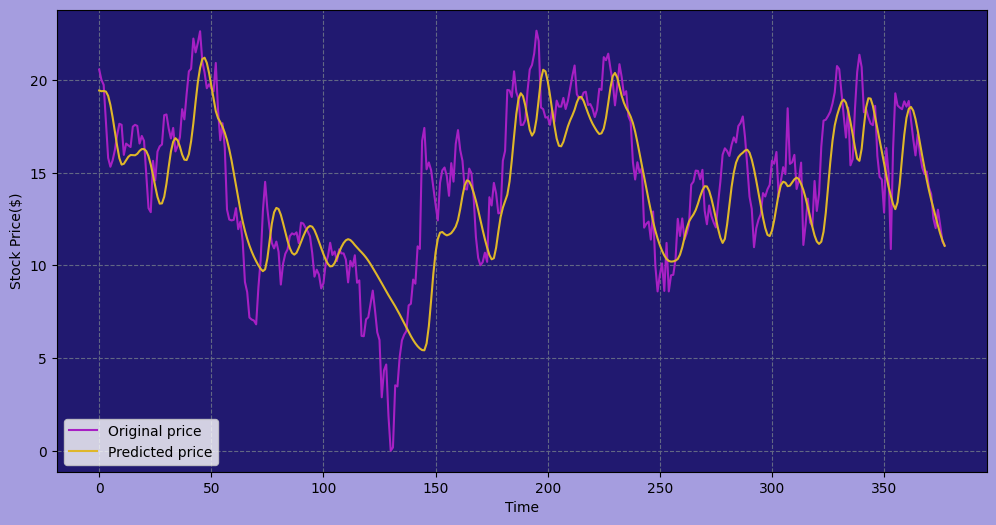

In [41]:
fig=plt.figure(figsize=(12,6))
fig.patch.set_facecolor('#A59DDF')

ax=plt.axes()
ax.set_facecolor('#211970')

plt.grid(True,linestyle='--',color='#626784')
plt.plot(y_test,'#A720C4',label="Original price")
plt.plot(y_predicted,'#DFB729',label="Predicted price")

plt.xlabel('Time')
plt.ylabel('Stock Price($)')
plt.legend()
plt.show()